# 🔬 **Table of Contents**

### 🛠 [Setup environment](#ST)
  - [Install packages](#IP)
  - [Data loading](#data-loading)

### 🧪 [Read-level QC](#QC)
  - [Get summary statisitcs of raw Fastq](#GS)
  - [Select read based on primer orientation](#RS)
  - [Primer trimming & quality filtering](#TP)
  - [Sorting reads into eight segments](#SRG)
  
### 🧬 [Reference-based assembly](#GA)
  - [Selecting reference](#RF)
  - [Consensus generation](#CG)

### 🧪 [Summary statistics of genome assembly](#CQC)
  - [Genomic depth](#GD)
  - [Genome coverage](#GD)
  - [Ambiguity / N’s](#AB)

### 📋 [Genome Annotation](#GAnno)
  - [Clade annotation](#CA)
  - [Vaccine effectiveness](#VE)
  - [Drug resistance](#DR)

# **Pipeline at glance** 📌

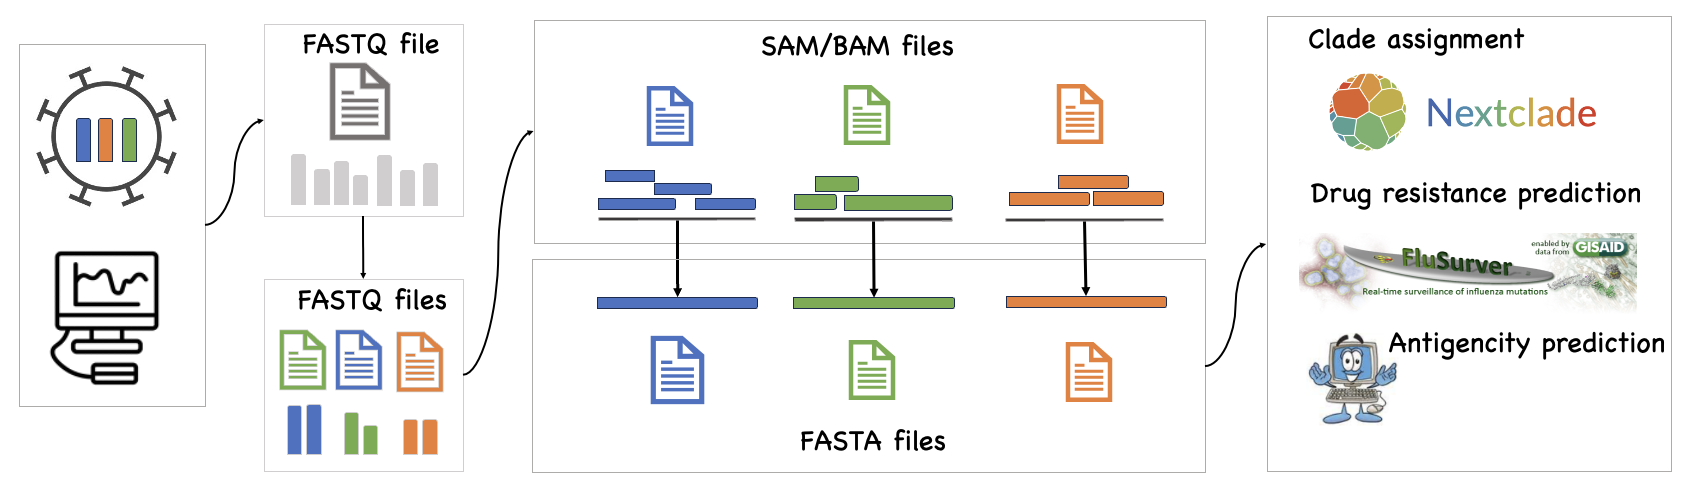

# **1. Setup environment** 🛠
<a name="ST"></a>

## **1.1 Install packages** <a name="IP"></a>

In [ ]:
! sudo apt-get update -y
! sudo apt-get install -y python3.10 python3.10-distutils python3.10-dev
! sudo apt-get install -y ncbi-blast+ seqkit minimap2
! Rscript -e "install.packages(c('R.utils','data.table','dplyr','reshape2'), repos='https://cloud.r-project.org/')"

## this command ...

In [ ]:
%%bash
curl -L -O https://github.com/samtools/samtools/releases/download/1.22/samtools-1.22.tar.bz2
tar -jxf samtools-1.22.tar.bz2
cd samtools-1.22
make

In [3]:
! pip install cutadapt --quiet
! pip install gdown --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.1/281.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 8.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1.2 Download FASTQ files** <a name="data-loading"></a>

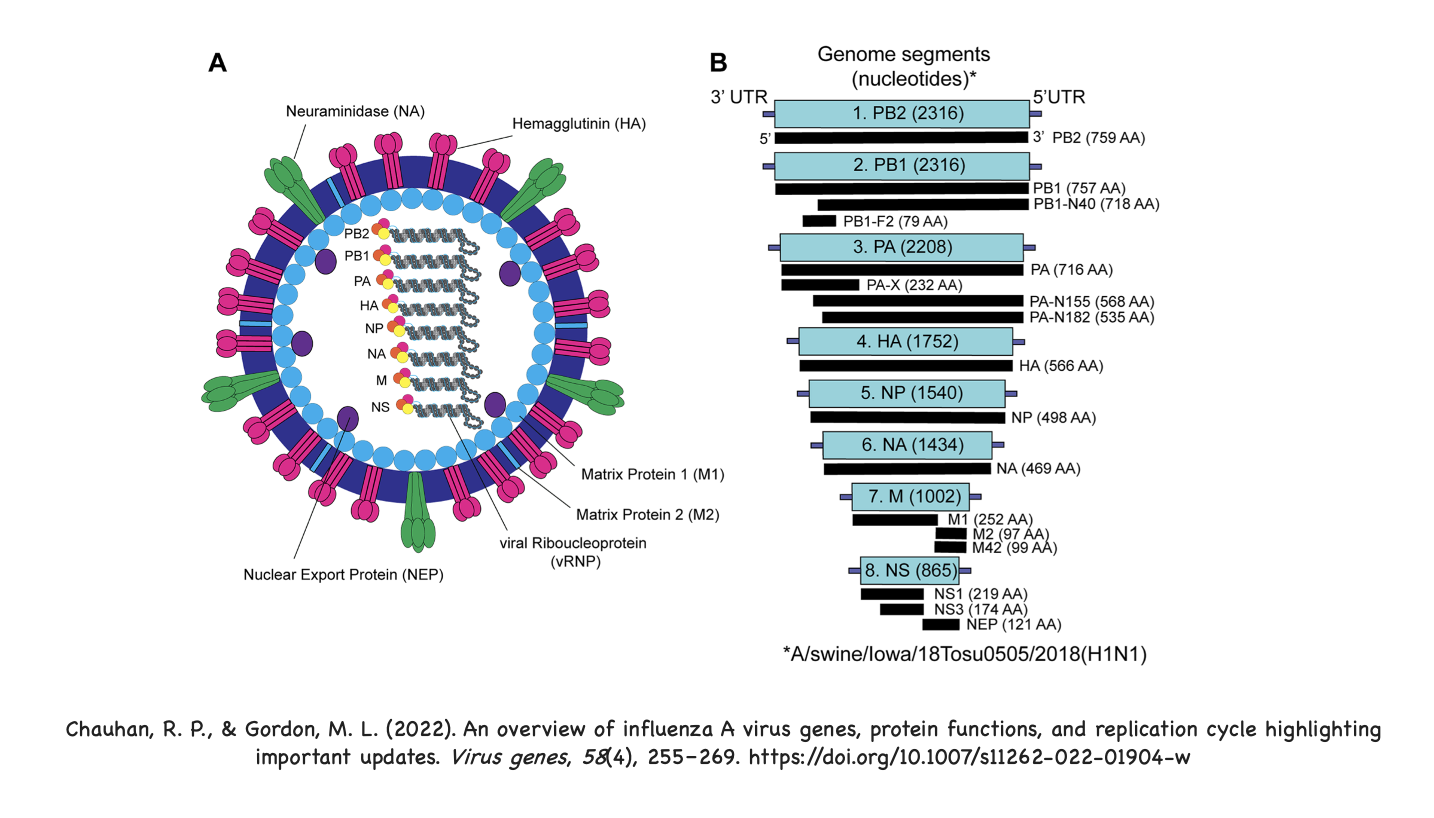

In [5]:
%%bash
git clone https://github.com/Ktaoma/flu-workshop-tropmed.git
gdown --fuzzy "https://drive.google.com/file/d/14vQNAQPHFyLLz9Yc6634rT2nEowIpdp4/view?usp=share_link" \
      -O flu-workshop-tropmed/blast_hits.tsv.gz

Cloning into 'flu-workshop-tropmed'...
Downloading...
From (original): https://drive.google.com/uc?id=14vQNAQPHFyLLz9Yc6634rT2nEowIpdp4
From (redirected): https://drive.google.com/uc?id=14vQNAQPHFyLLz9Yc6634rT2nEowIpdp4&confirm=t&uuid=2a5bc4a5-39ca-417b-9a77-42979ae209a6
To: /content/flu-workshop-tropmed/blast_hits.tsv.gz
100%|██████████| 125M/125M [00:01<00:00, 76.3MB/s]


In [7]:
sample_file = "flu-workshop-tropmed/sample.fq.gz"
reference_DNA="flu-workshop-tropmed/sequences_DNA.fasta"

# **Step 2: Read-level QC** 🧪 <a name="QC"></a>



seq = "computer"
read1 = "comuter"
read2 = "compuer"

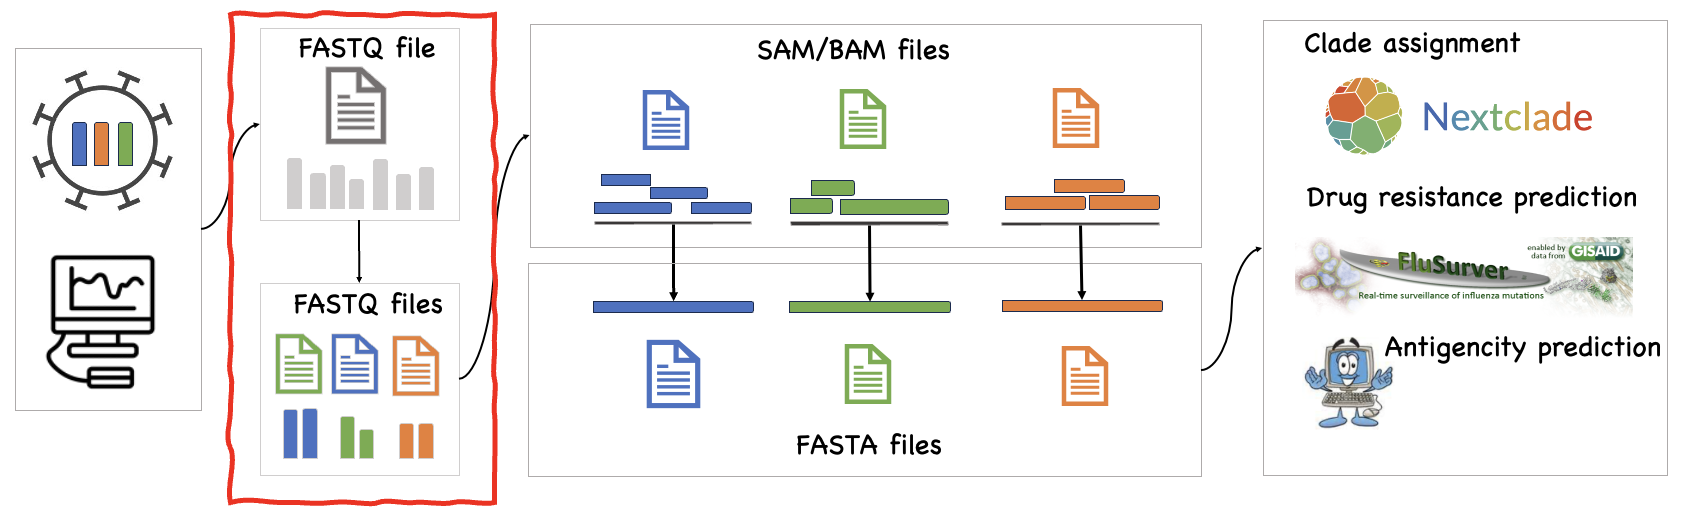

> ## **WHAT IS READ ❓❓❓**



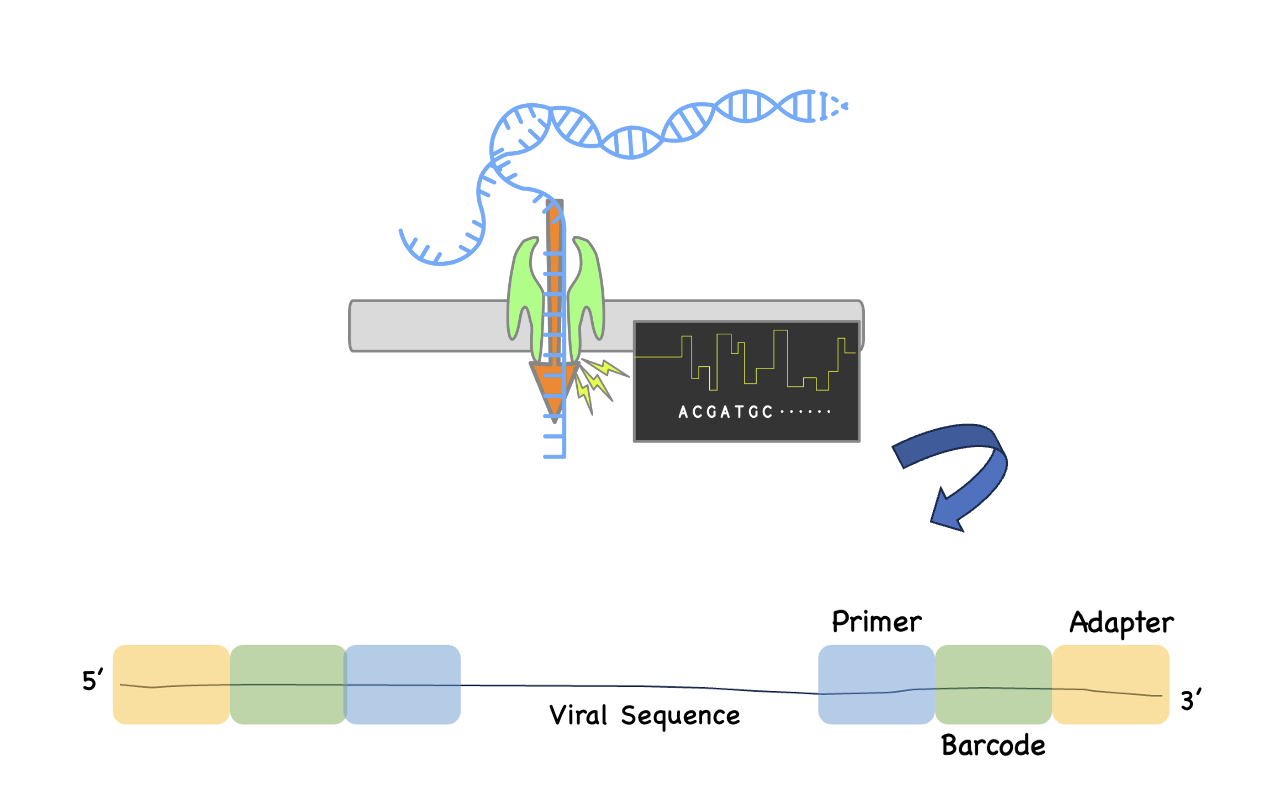

## **2.1: Get summary statisitcs of raw data**
<a name="GS"></a>


📌 **`FASTQ format`**

> `Line 1` (@SEQ_ID) → Read identifier <br>
> `Line 2` (sequence) → Nucleotide sequence (A, T, G, C) <br>
> `Line 3` (+) → Optional identifier, usually same as line 1 <br>
> `Line 4` (quality) → Phred quality scores in ASCII encoding

In [8]:
%%bash -s "$sample_file"
mkdir result
zcat $1 | head

@025918a1-e82a-4e04-91ca-3a10a64d9121 runid=b674d98d-3e2f-4900-a6d8-87a444f0d61f ch=373 start_time=2025-09-22T18:05:45.998071+07:00 flow_cell_id=FBA34581 basecall_gpu=Quadro_GV100 protocol_group_id=SeqAmpC9_Ba03 sample_id= barcode=barcode51 barcode_alias=barcode51 parent_read_id=025918a1-e82a-4e04-91ca-3a10a64d9121 basecall_model_version_id=dna_r10.4.1_e8.2_400bps_hac@v5.0.0
ACGCGTGATCAGCAAAAGCAGGTACTAATTCAAAATGGAAGATTTTGTGCGACAATGCTTCAACCCAATGATTGTCGAAGCTCCAGAAAAAGCAATGAAAGAGTATGGGGAGGATCTGAAAATTGAAACCAACAAATTTGCAGCAATATGCACTCACTTGGAGGTGTGTTTCATGTATTCAGATTTCCATTTCATCAATGAACAAGGCGAATCAATAGTAGTAGAACTTGACGATCCAAATGCACTGTTAAAACACAGATTTGAAATAATGGGGAGAGACAGAACAATGGCCTGGACAGTAGTAAACAGTATCTGCAACACTACTGGAGCTGAGAAACCGAAGTTTTTGCCGGATTTGTATGATTACATAGCCTATATGCATCACCACAATTGGAAGGATTTTCAGCAGAGTACAAACTGCTCCTTATTGTTCAGGCTCTTAGGACAAGACTCGAACCTGGGACTTTTGATCTTGAGGAGCTATGAAGCGATTGAGGAGTGCCTGATTAATGATCCCTGGGTTTTGCTCAATGCGTCTTGGTTCAACTCCTTCCTGACACATGCACTAAAATAGTTATAGCAGTGCTACTATTTGTCATCCGTCTGTCCAAAAAAGTACCTT

mkdir: cannot create directory ‘result’: File exists


In [10]:
%%bash -s "$sample_file"
seqkit stat $1 -Ta

file	format	type	num_seqs	sum_len	min_len	avg_len	max_len	Q1	Q2	Q3	sum_gap	N50	Q20(%)	Q30(%)
flu-workshop-tropmed/sample.fq.gz	FASTQ	DNA	116673	85822612	61	735.6	5477	642.0	648.0	906.0	0	651	82.31	62.28


In [11]:
%%bash -s "$sample_file"
mkdir -p result/stat
seqkit stat $1 > result/stat/sample_01.stat

## **2.2: Select read based on primer orientation**

<a name="RS"></a>

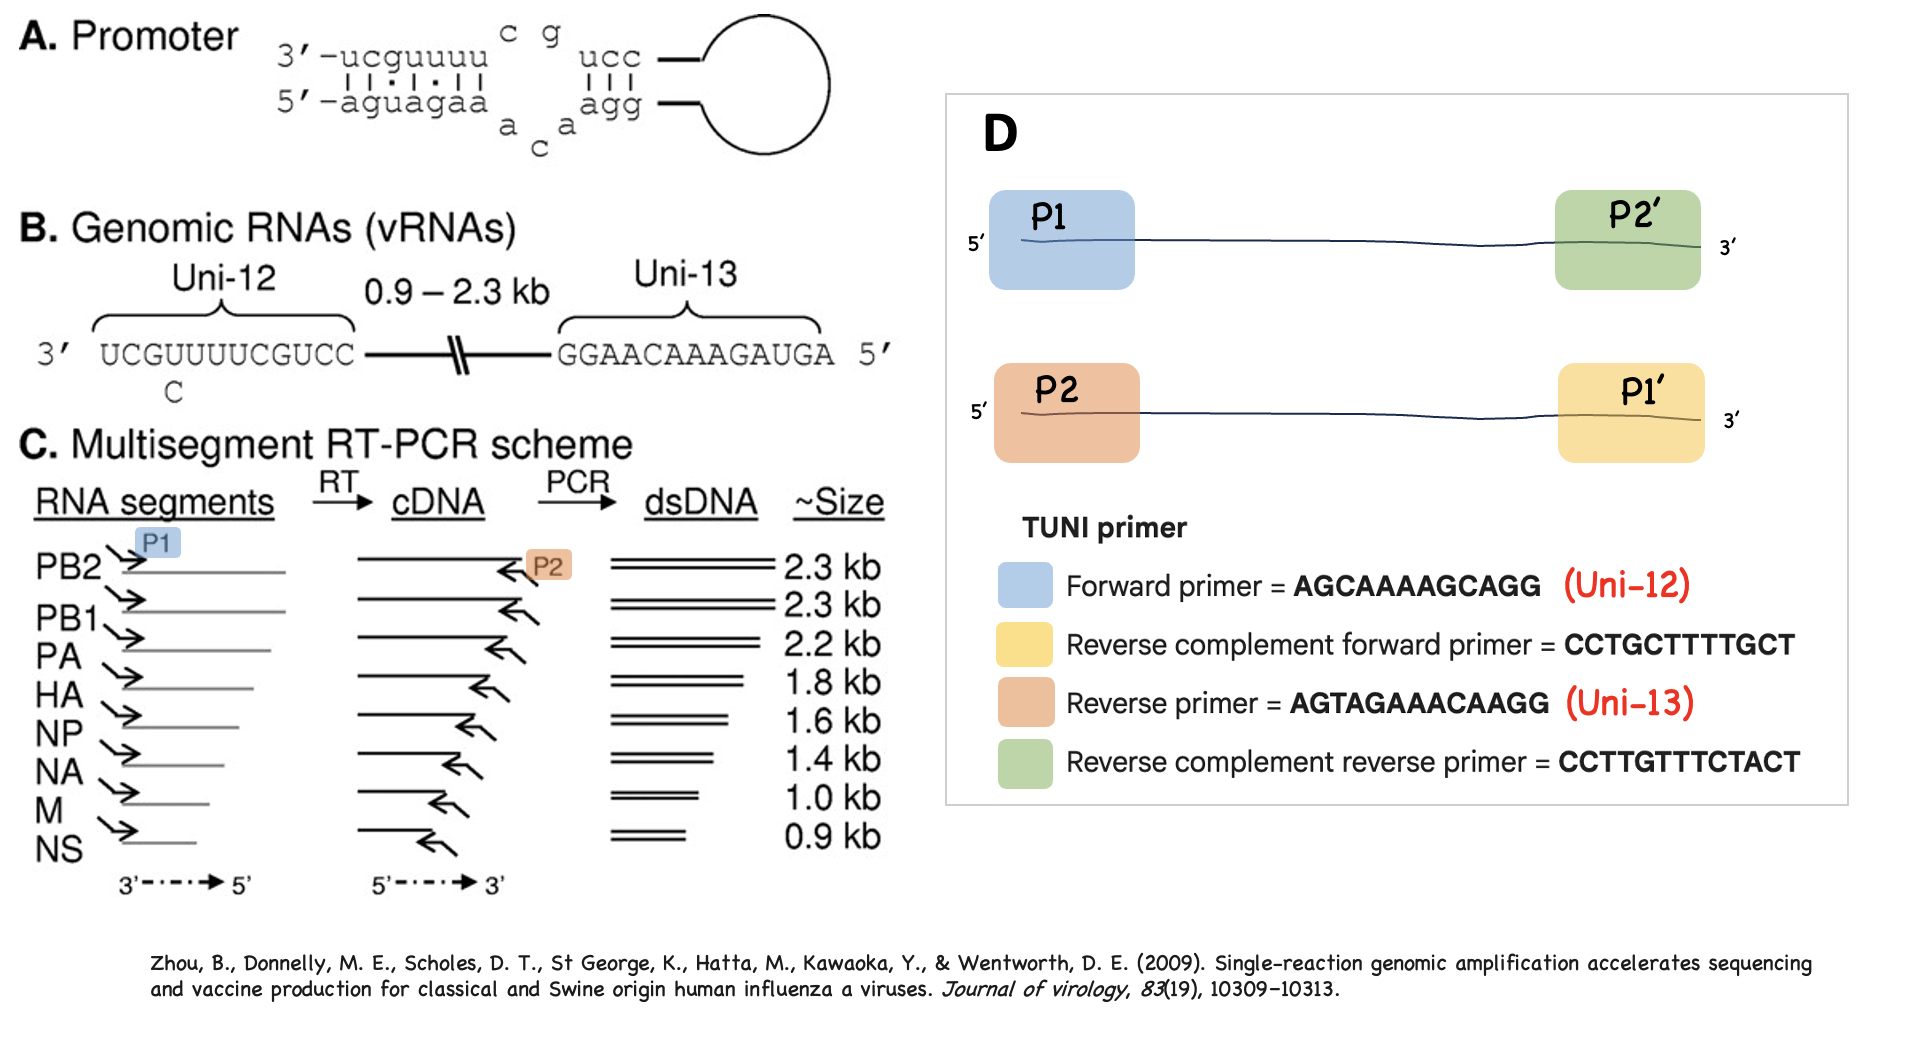

In [12]:
%%bash -s "$sample_file"

mkdir -p result/pattern
#forward primer
seqkit locate -p AGCAAAAGCAGG $1 |\
  gzip -9 > result/pattern/forward.tsv.gz

#reverse primer
seqkit locate -p AGTAGAAACAAGG $1 |\
  gzip -9 > result/pattern/reverse.tsv.gz

In [13]:
! zcat result/pattern/forward.tsv.gz | head

seqID	patternName	pattern	strand	start	end	matched
025918a1-e82a-4e04-91ca-3a10a64d9121	AGCAAAAGCAGG	AGCAAAAGCAGG	+	11	22	AGCAAAAGCAGG
de48c8d8-6d0a-4ca8-b9f9-3b6368aa0533	AGCAAAAGCAGG	AGCAAAAGCAGG	-	625	636	AGCAAAAGCAGG
b9c79478-4f75-4598-99b7-5eae53141404	AGCAAAAGCAGG	AGCAAAAGCAGG	-	619	630	AGCAAAAGCAGG
a689c570-2b69-47b2-bd76-b6220da86216	AGCAAAAGCAGG	AGCAAAAGCAGG	+	11	22	AGCAAAAGCAGG
6174408b-9a1e-4ebc-8479-ba2794b92e0d	AGCAAAAGCAGG	AGCAAAAGCAGG	+	11	22	AGCAAAAGCAGG
21769687-c277-424c-abd1-7d72c54feb05	AGCAAAAGCAGG	AGCAAAAGCAGG	-	622	633	AGCAAAAGCAGG
9521ac7d-a6e5-4965-a7b0-7be927264cc3	AGCAAAAGCAGG	AGCAAAAGCAGG	-	431	442	AGCAAAAGCAGG
53f1c142-0795-4c82-a69e-9d130bc192b1	AGCAAAAGCAGG	AGCAAAAGCAGG	+	11	22	AGCAAAAGCAGG
af791bd5-d9fb-468a-987e-a9a3f8ce5e38	AGCAAAAGCAGG	AGCAAAAGCAGG	+	10	21	AGCAAAAGCAGG


In [14]:
! zcat result/pattern/reverse.tsv.gz | head

seqID	patternName	pattern	strand	start	end	matched
025918a1-e82a-4e04-91ca-3a10a64d9121	AGTAGAAACAAGG	AGTAGAAACAAGG	-	619	631	AGTAGAAACAAGG
de48c8d8-6d0a-4ca8-b9f9-3b6368aa0533	AGTAGAAACAAGG	AGTAGAAACAAGG	+	11	23	AGTAGAAACAAGG
a689c570-2b69-47b2-bd76-b6220da86216	AGTAGAAACAAGG	AGTAGAAACAAGG	-	575	587	AGTAGAAACAAGG
6174408b-9a1e-4ebc-8479-ba2794b92e0d	AGTAGAAACAAGG	AGTAGAAACAAGG	-	620	632	AGTAGAAACAAGG
21769687-c277-424c-abd1-7d72c54feb05	AGTAGAAACAAGG	AGTAGAAACAAGG	+	11	23	AGTAGAAACAAGG
9521ac7d-a6e5-4965-a7b0-7be927264cc3	AGTAGAAACAAGG	AGTAGAAACAAGG	+	11	23	AGTAGAAACAAGG
4841f504-3fa9-40f6-963a-b86e3cc7bf07	AGTAGAAACAAGG	AGTAGAAACAAGG	+	11	23	AGTAGAAACAAGG
af791bd5-d9fb-468a-987e-a9a3f8ce5e38	AGTAGAAACAAGG	AGTAGAAACAAGG	-	429	441	AGTAGAAACAAGG
b4464ae1-6e28-43de-97c2-30806efb2f16	AGTAGAAACAAGG	AGTAGAAACAAGG	-	293	305	AGTAGAAACAAGG


In [15]:
! chmod u+x ./flu-workshop-tropmed/parse_primer.R
! Rscript ./flu-workshop-tropmed/parse_primer.R result/pattern both


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

                                  Var1 - +
1 0000e7d1-5ab4-4929-a7a2-e84a44f488da 0 1
2 00018e2d-e3ed-4cc3-acd1-2f4905c9a03c 0 1
3 0001b43b-cda2-4572-9482-9dce08023830 0 1
4 00028af4-2e0e-479f-8c1c-b0f043e9c9ed 0 1
5 0002d036-d488-49b6-aef4-c849c8788d48 1 0
6 00037bfc-7ebc-4d14-9713-a57226b47d4d 1 0
                                  Var1 - +
1 0000e7d1-5ab4-4929-a7a2-e84a44f488da 1 1
2 00018e2d-e3ed-4cc3-acd1-2f4905c9a03c 1 0
3 0001b43b-cda2-4572-9482-9dce08023830 1 0
4 00028af4-2e0e-479f-8c1c-b0f043e9c9ed 1 0
5 0002d036-d488-49b6-aef4-c849c8788d48 0 1
6 00037bfc-7ebc-4d14-9713-a57226b47d4d 0 1


In [16]:
%%bash -s "$sample_file"

mkdir -p result/fastq

seqkit grep -f result/pattern/QC_id.tsv $1 |\
  gzip -9 > result/fastq/filtered.fq.gz

seqkit grep -vf result/pattern/QC_id.tsv $1 |\
  gzip -9 > result/fastq/no_passed.fq.gz

[INFO] 82446 patterns loaded from file
[INFO] 82446 patterns loaded from file


In [17]:
%%bash
seqkit stat result/fastq/filtered.fq.gz | tail -n +2 >> result/stat/sample_01.stat
seqkit stat result/fastq/no_passed.fq.gz | tail -n +2 >> result/stat/sample_01.stat

In [18]:
! cat result/stat/sample_01.stat

file                               format  type  num_seqs     sum_len  min_len  avg_len  max_len
flu-workshop-tropmed/sample.fq.gz  FASTQ   DNA    116,673  85,822,612       61    735.6    5,477
result/fastq/filtered.fq.gz  FASTQ   DNA     82,446  61,394,331       61    744.7    4,454
result/fastq/no_passed.fq.gz  FASTQ   DNA     34,227  24,428,281       78    713.7    5,477


**📌 At this step, these are the read populations you have**
<br>
<br>
**Forward primer** 🔵 - reverse complement of **Reverse primer** 🟢

> ACGCGTGATC**AGCAAAAGCAGG**CGT...ACTGTCCAAAAAAGTA**CCTTGTTTCTACT**GATCACGCGTA

**Reverse primer** 🔴 - reverse complement of **Forward primer** 🟡


> ACGCGTGATC**AGTAGAAACAAGG**TCGTTTTTAAACTA...TGCTGAATATAATTGA**CCTGCTTTTGCT**GATCACGCGTA


#  ⛳ Open terminal and check what happen to remaining reads ?

Hint


```
zcat flu-workshop-tropmed/..... |\
  grep -E -e AGCAAAAGCAGG --color=always -B1 -A2|\
  GREP_COLORS='mt=01;92' grep -E -e CCTTGTTTCTACT --color=always -B1 -A2 | head
```



## **2.3: Primer trimming & quality filtering**

<a name="TP"></a>

In [ ]:
%%bash
cutadapt --revcomp -a AGCAAAAGCAGG...CCTTGTTTCTACT -m 500 -q 10 -o result/fastq/sample_final_qc.fq.gz result/fastq/filtered.fq.gz
seqkit fq2fa result/fastq/sample_final_qc.fq.gz |\
  gzip -9 > result/fastq/sample_final.fa.gz

In [20]:
! seqkit stat result/fastq/sample_final.fa.gz
! seqkit stat result/fastq/sample_final.fa.gz >> result/stat/sample_01.stat

file                             format  type  num_seqs     sum_len  min_len  avg_len  max_len
result/fastq/sample_final.fa.gz  FASTA   DNA     74,732  54,525,518      500    729.6    4,406


In [21]:
! cat result/stat/sample_01.stat

file                               format  type  num_seqs     sum_len  min_len  avg_len  max_len
flu-workshop-tropmed/sample.fq.gz  FASTQ   DNA    116,673  85,822,612       61    735.6    5,477
result/fastq/filtered.fq.gz  FASTQ   DNA     82,446  61,394,331       61    744.7    4,454
result/fastq/no_passed.fq.gz  FASTQ   DNA     34,227  24,428,281       78    713.7    5,477
file                             format  type  num_seqs     sum_len  min_len  avg_len  max_len
result/fastq/sample_final.fa.gz  FASTA   DNA     74,732  54,525,518      500    729.6    4,406


In [30]:
! seqkit seq -m 4400 result/fastq/filtered.fq.gz | seqkit subseq -r 2300:4400  | \
   seqkit fq2fa
#> result/fastq/badguy.fa

[WARN] you may switch on flag -g/--remove-gaps to remove spaces
>9944ace0-a4e5-4fe7-a32d-1a41f192befe runid=b674d98d-3e2f-4900-a6d8-87a444f0d61f ch=235 start_time=2025-09-23T01:30:44.998071+07:00 flow_cell_id=FBA34581 basecall_gpu=Quadro_GV100 protocol_group_id=SeqAmpC9_Ba03 sample_id= barcode=barcode51 barcode_alias=barcode51 parent_read_id=9944ace0-a4e5-4fe7-a32d-1a41f192befe basecall_model_version_id=dna_r10.4.1_e8.2_400bps_hac@v5.0.0
AACCAACAAATTTACAGCAATATGCACTGGCTTGGAGGTGTGTTTCATGTATTCAGACCCCATTTCATCAATGAACAAGGCGAATCAATAGTGGCTAGAACTTGACGATCCAAATGCACTGTTAAAACACAGTTGAAATAATAGAGGGGAGAGACAGGAACAATGGCCTGGACAGTAGTAAACAGTATCTGCAACACTACTGGAGCTGAGAAACTGAAGTTTTTGCCGGATTTGTATGTACAAAGAGAACAGATTCATCGAAATTGGAGTGACAAGGAGAGAAGTCCACATATATTACCTTGAAAAGGCCAATAAGATTAAATCTGAGAAAACACACATTCACATTTTTTCATTCACTGGGGAGAAATGGCCACAAGGGCAGACTACACTCTCGATGGCTCAGGCTAGGATCAAAACCAGGCTGTTTACATTAAGACAAGAAATGGCCAACAGAGGCCTCTGGTATTCCTTTCGTCAGTCCGAAAGAGGCGAAGAAAATTGAAGAAAAATTTGAAATCACAGGGACTATGCGCAGGCTTGCCAAACCAATTGCTCCAC

## **2.4: Sorting reads into eight segments**

<a name="SRG"></a>

In [31]:
%%bash -s "$reference_DNA"
mkdir -p result/mapping
#makeblastdb -in $1 -dbtype nucl
#zcat result/fastq/sample_final.fa.gz |\
#    blastn -query - -db $1 -outfmt '6 qseqid sseqid pident length qlen' | gzip -9 > result/mapping/blast_hits.tsv.gz

In [32]:
df = pd.read_csv("flu-workshop-tropmed/blast_hits.tsv.gz",sep="\t",header=None)
df.columns = ["qseqid","sseqid","pident","length","qlen"]
df.head()

qseqid      sseqid  pident  length  qlen
0  025918a1-e82a-4e04-91ca-3a10a64d9121  MF673164.1  96.275     349   596
1  025918a1-e82a-4e04-91ca-3a10a64d9121  MF673164.1  93.798     258   596
2  025918a1-e82a-4e04-91ca-3a10a64d9121  KX133409.1  96.275     349   596
3  025918a1-e82a-4e04-91ca-3a10a64d9121  KX133409.1  93.798     258   596
4  025918a1-e82a-4e04-91ca-3a10a64d9121  KJ943092.1  96.254     347   596

In [33]:
#metadata
metadata = pd.read_csv("flu-workshop-tropmed/metadata.tsv",sep="\t",header=None)
metadata.columns = ["sseqid","strain","segment"]
segment_to_gene = {
    1: "PB2",
    2: "PB1",
    3: "PA",
    4: "HA",
    5: "NP",
    6: "NA_",
    7: "M",
    8: "NS"
}

# replace segment number with gene name
metadata['gene'] = metadata['segment'].map(segment_to_gene)
metadata = metadata.drop(columns='segment')
metadata['sseqid'] = metadata['sseqid'].str.strip()
metadata.head()

sseqid                                             strain gene
0  KC306166.1  Influenza B virus (B/Wisconsin/01/2010) segmen...   HA
1  KP067337.1  Influenza B virus (B/Ulan Ude/6/2003) segment ...  NA_
2  KP861940.1  Influenza B virus (B/Tehran/88859/2014) segmen...   HA
3  KP861953.1  Influenza B virus (B/Tehran/88859/2014) segmen...  NA_
4  KP861939.1  Influenza B virus (B/Tehran/88658/2014) segmen...   HA

In [34]:
mdf = pd.merge(df,metadata, on='sseqid')
mdf.to_csv("result/mapping/map_segment.tsv")

In [35]:
mdf_selected = mdf.iloc[:,[0,6]].drop_duplicates()
gene_counts_df = mdf_selected['gene'].value_counts().reset_index()
gene_counts_df.columns = ['gene', 'count']
gene_counts_df

gene  count
0   PA  48456
1   NS  13106
2    M   8103
3  PB2   2533
4   NP   1256
5   HA    825
6  NA_    509
7  PB1     19

In [36]:
for i in ["M","NS","NA_","NP","HA","PA","PB1","PB2"]:
  mdf.query("gene == @i").iloc[:,0].drop_duplicates().to_csv("result/mapping/"+i+"_segment.tsv", sep="\t", index=False, header=False)

In [37]:
%%bash
for j in "M" "NS" "NA_" "NP" "HA" "PA" "PB1" "PB2";
do
  seqkit grep -f result/mapping/${j}_segment.tsv result/fastq/sample_final.fa.gz |\
    gzip -9 > result/fastq/${j}_segment.fq.gz
done

[INFO] 8103 patterns loaded from file
[INFO] 13106 patterns loaded from file
[INFO] 509 patterns loaded from file
[INFO] 1256 patterns loaded from file
[INFO] 825 patterns loaded from file
[INFO] 48456 patterns loaded from file
[INFO] 19 patterns loaded from file
[INFO] 2533 patterns loaded from file


#  ⛳ Generate the summary statistic of all segments by using **seqkit**



Hint:
```
for i in .....;
do
    seqkit stat $i ... > ....

done
```




In [51]:
%%bash
#now it is your turn
#result/fastq/${i}_segment.fq.gz
#result/stat/${i}_all.stat
for i in "M" "NS" "NA_" "NP" "HA" "PA" "PB1" "PB2";
do
    seqkit stat result/fastq/${i}_segment.fq.gz >> result/stat/stat_all.stat

done

#cat result/stat/*_all.stat

# **Step 3:  Reference-based assembly** 🧬
<a name="GA"></a>

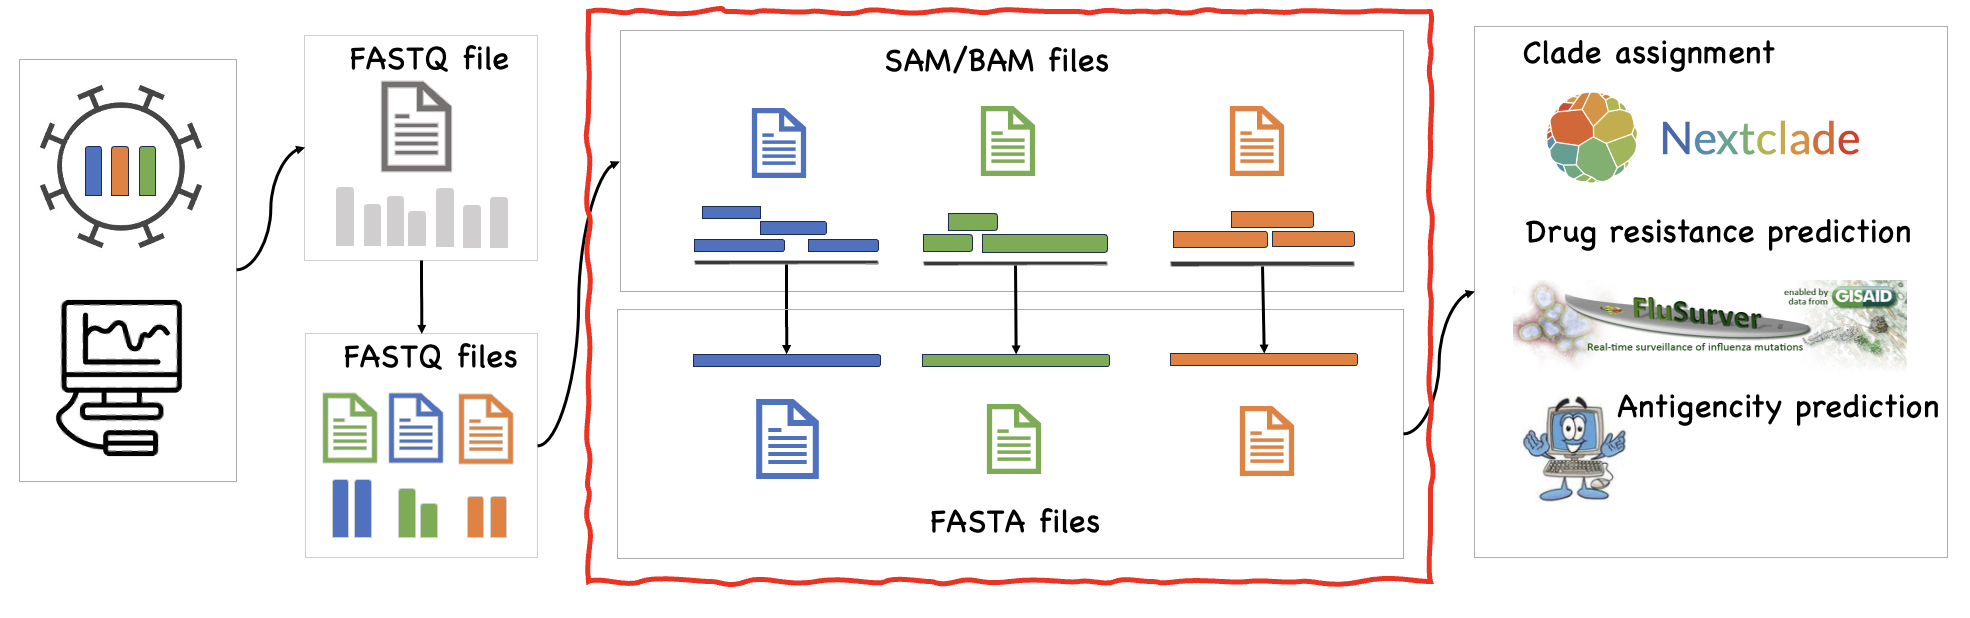

## **3.1: Reference selection**
<a name="RF"></a>

In [52]:
df_reference = pd.read_csv("result/mapping/map_segment.tsv")
df_reference_edited = df_reference.iloc[:,[2,6]].drop_duplicates()
df_reference_edited

sseqid                                             strain
0         MF673164.1  Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...
2         KX133409.1  Influenza A virus (A/Gainesville/01/2016(H3N2)...
4         KJ943092.1  Influenza A virus (A/Santiago/p20d7/2013(N2)) ...
6         KU888852.1  Influenza A virus (A/DC/1/2014(H3N2)) segment ...
8         KJ943749.1  Influenza A virus (A/Santiago/p2d7/2012(N2)) s...
...              ...                                                ...
6843473   KP638520.1  Influenza A virus (A/Vietnam/UT36236/2010(H5N1...
6843474   KP638521.1  Influenza A virus (A/Vietnam/UT36250-1/2010(H5...
6843475   KP638522.1  Influenza A virus (A/Vietnam/UT36282/2010(H5N1...
6843476   KP638523.1  Influenza A virus (A/Vietnam/UT36285/2010(H5N1...
10043201  MG572500.1  Influenza A virus (A/Changsha/44/2017(H7N9)) s...

[1998 rows x 2 columns]

In [53]:
cnt = df_reference.groupby(['strain', 'gene']).size().reset_index(name='count')
cnt_sorted = cnt.sort_values(['gene', 'count'], ascending=[True, False])
top5_per_gene = cnt_sorted.groupby(['gene']).head(3).reset_index(drop=True)
top5_per_gene

strain gene   count
0   Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...   HA    1606
1   Influenza A virus (A/Guangdong/SKLRD01/2017(H3...   HA     833
2   Influenza A virus (A/Israel/B5990/2016(H3N2)) ...   HA     833
3   Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...    M   16202
4   Influenza A virus (A/Jiangsu/1/2013(H7N9)) seg...    M   15892
5   Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...    M    8122
6   Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...  NA_    1020
7   Influenza A virus (A/Alappey/MCVR449/2009(H3N2...  NA_     511
8   Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...  NA_     511
9   Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...   NP    2516
10  Influenza A virus (A/Jiangsu/1/2013(H7N9)) seg...   NP    1920
11  Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...   NP    1257
12  Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...   NS   26253
13  Influenza A virus (A/Jiangsu/1/2013(H7N9)) seg...   NS   20803
14  Influenza A virus (A/Gainesville/01/2016(H3N2)...   NS   13135
15  Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...   PA  182674
16  Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...   PA   96892
17  Influenza A virus (A/Gainesville/01/2016(H3N2)...   PA   96889
18  Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...  PB1      38
19  Influenza A virus (A/Thailand/NBL1/2006(H5N1))...  PB1      38
20  Influenza A virus (A/Jiangsu/1/2013(H7N9)) seg...  PB1      34
21  Influenza A virus (A/Hong Kong/01/1968(H3N2)) ...  PB2    9987
22  Influenza A virus (A/Beijing/PUMCH02/2017(H3N2...  PB2    5033
23  Influenza A virus (A/DC/1/2014(H3N2)) segment ...  PB2    5032

In [54]:
pd.merge(df_reference_edited,top5_per_gene,on="strain").to_csv("result/mapping/map_segment_curated.csv")

In [58]:
%%bash
acc=$(cat result/mapping/map_segment_curated.csv | grep "HA" | cut -d "," -f2,6 | sort -k2 | cut -d ',' -f1 | head -n+1)
mkdir -p result/consensus/HA
seqkit grep -n -r -p $acc flu-workshop-tropmed/sequences_DNA.fasta > result/consensus/HA/reference_HA.fasta

In [59]:
! head result/consensus/HA/reference_HA.fasta

>KY321927.1 |Influenza A virus (A/Hong Kong/01/1968(H3N2)) segment 4 hemagglutinin (HA) gene, complete cds|4|H3N2|China|2016-12-24|1968
AGCAAAAGCAGGGGATAATTCTATTAATCATGAAGACCATCATTGCTTTGAGCTACATTT
TCTGTCTGGCTCTCGGCCAAGACCTTCCAGGAAATGACAACAGCACAGCAACGCTGTGCC
TGGGACATCATGCGGTGCCAAACGGAACACTAGTGAAAACAATCACAGATGATCAGATTG
AAGTGACTAATGCTACTGAGCTAGTTCAGAGCTCCTCAACGGGGAAAATATGCAACAATC
CTCATCGAATCCTTGATGGAATAGACTGCACACTGATAGATGCTCTATTGGGGGACCCTC
ATTGTGATGTTTTTCAAAATGAGACATGGGACCTTTTCGTTGAACGCAGCAAAGCTTTCA
GCAACTGTTACCCTTATGATGTGCCAGATTATGCCTCCCTTAGGTCACTAGTTGCCTCGT
CAGGCACTCTGGAGTTTATCACTGAGGGTTTCACTTGGACTGGGGTCACTCAGAATGGGG
GAAGCAATGCTTGCAAAAGGGGACCTGGTAGCGGTTTTTTCAGTAGACTGAACTGGTTGA


## **3.2: Consensus generation**


<a name="CG"></a>

In [60]:
%%bash
minimap2 -a result/consensus/HA/reference_HA.fasta result/fastq/HA_segment.fq.gz > result/consensus/HA/HA_aln.sam

[M::mm_idx_gen::0.002*1.67] collected minimizers
[M::mm_idx_gen::0.003*1.63] sorted minimizers
[M::main::0.003*1.62] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.003*1.60] mid_occ = 10
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.003*1.59] distinct minimizers: 321 (100.00% are singletons); average occurrences: 1.000; average spacing: 5.498; total length: 1765
[M::worker_pipeline::0.504*1.91] mapped 825 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -a result/consensus/HA/reference_HA.fasta result/fastq/HA_segment.fq.gz
[M::main] Real time: 0.505 sec; CPU: 0.966 sec; Peak RSS: 0.009 GB


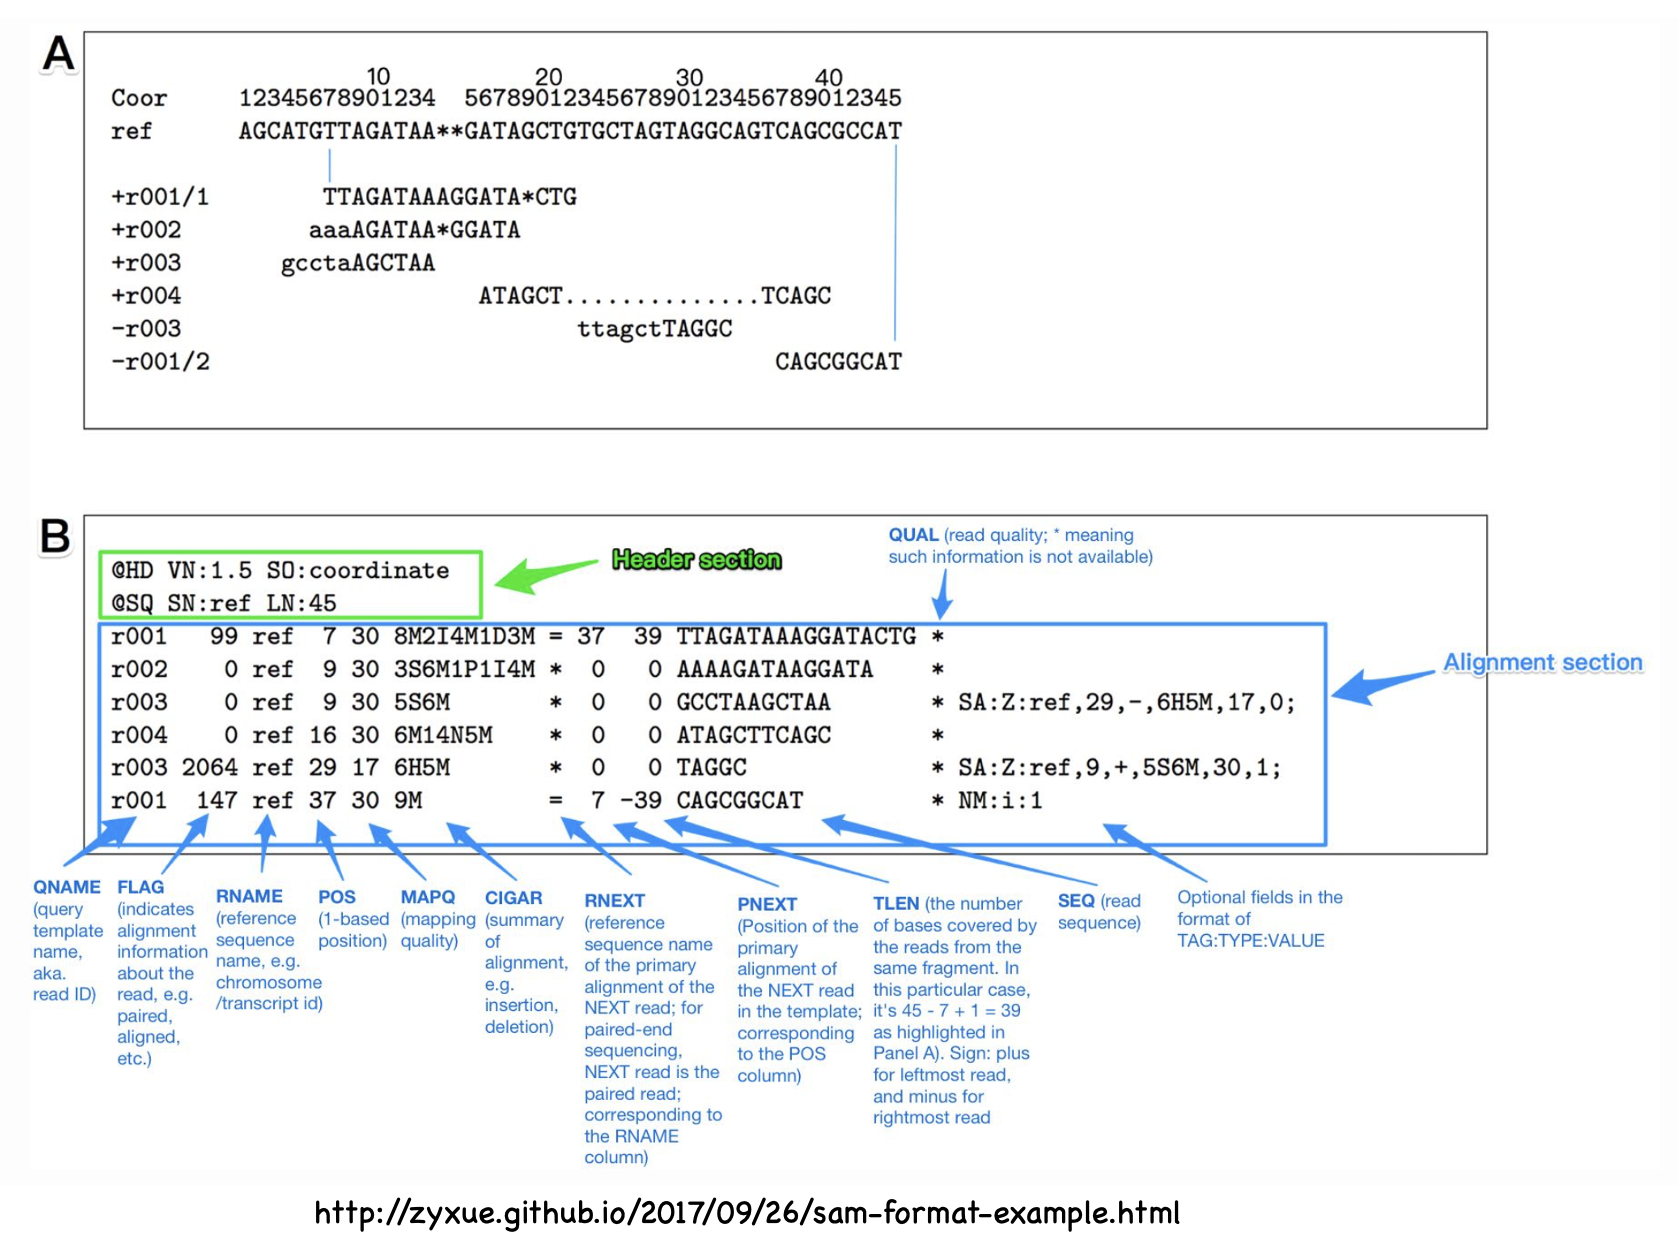

### Check out the FLAG ▶ https://broadinstitute.github.io/picard/explain-flags.html

In [61]:
! cat result/consensus/HA/HA_aln.sam | head

@SQ	SN:KY321927.1	LN:1765
@PG	ID:minimap2	PN:minimap2	VN:2.24-r1122	CL:minimap2 -a result/consensus/HA/reference_HA.fasta result/fastq/HA_segment.fq.gz
e9542309-deb5-4071-8929-d9733fb45562	0	KY321927.1	14	60	210M2D366M1I4M2D43M1D6M1I27M1D21M1D192M2I3M1D260M1I58M1D32M1I122M1D4M1D85M1I279M3D13M	*	0	0	GATAATTCTATTAACCATGAAGGCTATCATTGCTTTGAGCAACATTCTATGTCTTGTTTTCGCTCAAAAAATACCTGGAAATGACAATAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTACCAAACGGAACTATAGTGAAAACAATCACAAATGACCGAATTGAAGTTACTAATGCTACTGAGTTGGTTCAGAATTCATCAATAGGTAATATGCAACAGTCCTCATCAGATCCTTGATGGAGGGAACTGCAAACTAATAGATGCTCTATTGGGGGACCCTCAGTGTGACGGCTTTCAGAATAAGGAATGGGACCTTTTTGTTGAACGAAGCAGAGCCAACAGCAGCTGTTACCCTTATGATGTGCCGGATTATGCCTCCCTTAGGTCACTAGTTGCCTCATCCGGAACACTGGAGTTTAAAGATGAAAGCTTCAATTGGACCGGAGTCAAACAAAACGGAACAAGTTCTGCGTGCAAAAGGGGATCTAGTAATAGTTTTTTTAGTAGATTAAATTGGTTGACCAGCTTAAACAACATATATCCAGCACAGAACGTGACTATGCCAAACAAGGAACAATTGACAAATTGTACATTTGGGGGGTTCATCATCCGGATACGGACAAGAACCAATTCTCCCTGTTTGCTCAATCATCAGGAGAATCACAGTATCTACCAAAGAAGCCAACAAGCTGTAAT

In [62]:
%%bash
samtools-1.22/samtools view -F 4 -b result/consensus/HA/HA_aln.sam > result/consensus/HA/HA_aln.mapped.bam
samtools-1.22/samtools sort result/consensus/HA/HA_aln.mapped.bam -o result/consensus/HA/HA_aln.mapped_sorted.bam
samtools-1.22/samtools index result/consensus/HA/HA_aln.mapped_sorted.bam
samtools-1.22/samtools faidx result/consensus/HA/reference_HA.fasta

# ⛳ Let check BAM file ▶ https://igv.org/app/

In [71]:
%%bash
samtools-1.22/samtools consensus -m simple -d 30 -A result/consensus/HA/HA_aln.mapped_sorted.bam > result/consensus/HA/HA_consensus.fasta
cat result/consensus/HA/HA_consensus.fasta

>KY321927.1
NNNNNNNNNNNNGGATAATTCTATTAACCATGAAGGCTATCATTGCTTTGAGCAACATTCTATGTCTTGT
TTTCGCTCAAAAAATACCTGGAAATGACAATAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTACCA
AACGGAACTATAGTGAAAACAATCACAAATGACCGAATTGAAGTTACTAATGCTACTGAGTTGGTTCAGA
ATTCATCAATAGGTAAAATATGCAACAGTCCTCATCAGATCCTTGATGGAGGGAACTGCAAACTAATAGA
TGCTCTATTGGGGGACCCTCAGTGTGACGGCTTTCAGAATAAGGAATGGGACCTTTTTGTTGAACGAAGC
AGAGCCAACAGCAGCTGTTACCCTTATGATGTGCCGGATTATGCCTCCCTTAGGTCACTAGTTGCCTCAT
CCGGAACACTGGAGTTTAAAGATGAAAGCTTCAATTGGACCGGAGTCAAACAAAACGGAACAAGTTCTGC
GTGCAAAAGGGGATCTAGTAATAGTTTTTTTAGTAGATTAAATTGGTTGACCAGCTTAAACAACATATAT
CCAGCACAGAACGTGACTATGCCAAACAAGGAACAATTTGACAAATTGTACATTTGGGGGGTTCATCATC
CGGATACGGACAAGAACCAATTCTCCCTGTTTGCTCAATCATCAGGAAGAATCACAGTATCTACCAAAAG
AAGCCAACAAGCTGTAATCCCAAATATTGGATCTAGACCCAGAGTAAGGGATATCCCTAGCAGAATAAGC
ATCTATTGGACAATAGTAAAACCGGGAGACATACTTTTGATTAACAGCACAGGGAATCTAATTGCTCCTA
GGGGTTACTTCAAAATACGAAGTGGGAAAAGCTCAATAATGAGATCAGACGCACCCATTGGCGAATGTAA
GTCTGAATGCATCACTCCAAATGGCAGCATTCCCAATGACAAGCCGTTCCAAAATGTAAACAGGA

# ⛳ Generate consensus of the remaining segments


Hint:

```
for i in M NS NA_ NP HA PA PB1 PB2;
do

    echo "gene $i"

    #1. select reference    

    #2. map read to reference

    #3. generate index

    #4 create reference

done
```




In [ ]:
%%bash
for i in M NS NA_ NP HA PA PB1 PB2;
do

    echo "gene $i"

    echo "#1. select reference"
    acc=$(cat result/mapping/map_segment_curated.csv | grep $i | cut -d "," -f2,6 | sort -k2 | cut -d ',' -f1 | head -n+1)
    mkdir -p result/consensus/${i}
    seqkit grep -n -r -p $acc flu-workshop-tropmed/sequences_DNA.fasta > result/consensus/${i}/reference_${i}.fasta

    echo "#2. map read to reference"
    minimap2 -a result/consensus/${i}/reference_${i}.fasta result/fastq/${i}_segment.fq.gz > result/consensus/${i}/${i}_aln.sam

    echo "#3. generate index"
    samtools-1.22/samtools view -F 4 -b result/consensus/${i}/${i}_aln.sam > result/consensus/${i}/${i}_aln.mapped.bam
    samtools-1.22/samtools sort result/consensus/${i}/${i}_aln.mapped.bam -o result/consensus/${i}/${i}_aln.mapped_sorted.bam
    samtools-1.22/samtools index result/consensus/${i}/${i}_aln.mapped_sorted.bam
    samtools-1.22/samtools faidx result/consensus/${i}/reference_${i}.fasta

    echo "#4 create reference"
    samtools-1.22/samtools consensus -m simple -d 30 -A result/consensus/${i}/${i}_aln.mapped_sorted.bam > result/consensus/${i}/${i}_consensus.fasta

done


In [ ]:
# @title
%%bash
rm -rf result/consensus
for i in M NS NA_ NP HA PA PB1 PB2;
do
    echo "gene $i"

    #1. select reference
    acc=$(cat result/mapping/map_segment_curated.csv | grep $i | cut -d "," -f2,6 | sort -k2 | cut -d ',' -f1 | head -n+1)
    mkdir -p result/consensus/$i
    seqkit grep -n -r -p  $acc flu-workshop-tropmed/sequences_DNA.fasta > result/consensus/$i/reference_$i.fasta

    #2. map read to reference
    minimap2 -a result/consensus/$i/reference_$i.fasta result/fastq/${i}_segment.fq.gz > result/consensus/$i/${i}_aln.sam

    #3. generate index
    samtools-1.22/samtools view -F 4 -b result/consensus/$i/${i}_aln.sam > result/consensus/$i/${i}_aln.mapped.bam
    samtools-1.22/samtools sort result/consensus/$i/${i}_aln.mapped.bam -o result/consensus/$i/${i}_aln.mapped_sorted.bam
    samtools-1.22/samtools index result/consensus/$i/${i}_aln.mapped_sorted.bam
    samtools-1.22/samtools faidx result/consensus/$i/reference_${i}.fasta

    #4 create reference
    samtools-1.22/samtools consensus -m simple -d 30 result/consensus/$i/${i}_aln.mapped_sorted.bam > result/consensus/$i/${i}_consensus.fasta

    seqkit fx2tab result/consensus/${i}/${i}_consensus.fasta |\
      awk -v sn=$i 'BEGIN{OFS="\t"} {print sn,$2}' | seqkit tab2fx > result/consensus/$i/${i}_consensus_rename.fasta

done

gene M
gene NS
gene NA_
gene NP
gene HA
gene PA
gene PB1
gene PB2


[M::mm_idx_gen::0.005*0.70] collected minimizers
[M::mm_idx_gen::0.006*0.63] sorted minimizers
[M::main::0.007*0.63] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.007*0.64] mid_occ = 10
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.007*0.64] distinct minimizers: 179 (100.00% are singletons); average occurrences: 1.000; average spacing: 5.486; total length: 982
[M::worker_pipeline::4.002*1.17] mapped 8103 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -a result/consensus/M/reference_M.fasta result/fastq/M_segment.fq.gz
[M::main] Real time: 4.004 sec; CPU: 4.675 sec; Peak RSS: 0.018 GB
[M::mm_idx_gen::0.001*2.05] collected minimizers
[M::mm_idx_gen::0.002*1.42] sorted minimizers
[M::main::0.002*1.41] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.002*1.39] mid_occ = 10
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.002*1.38] distinct minimizers: 161 (100.

In [77]:
! seqkit stat result/consensus/*/*_consensus.fasta

file                                      format  type  num_seqs  sum_len  min_len  avg_len  max_len
result/consensus/HA/HA_consensus.fasta    FASTA   DNA          1    1,757    1,757    1,757    1,757
result/consensus/M/M_consensus.fasta      FASTA   DNA          1      982      982      982      982
result/consensus/NA_/NA__consensus.fasta  FASTA   DNA          1    1,410    1,410    1,410    1,410
result/consensus/NP/NP_consensus.fasta    FASTA   DNA          1    1,497    1,497    1,497    1,497
result/consensus/NS/NS_consensus.fasta    FASTA   DNA          1      838      838      838      838
result/consensus/PA/PA_consensus.fasta    FASTA   DNA          1    2,205    2,205    2,205    2,205
result/consensus/PB1/PB1_consensus.fasta  FASTA   DNA          1      886      886      886      886
result/consensus/PB2/PB2_consensus.fasta  FASTA   DNA          1    2,316    2,316    2,316    2,316


In [78]:
! cat result/consensus/HA/HA_consensus.fasta

>KY321927.1
NNNNNNNNNNNNGGATAATTCTATTAACCATGAAGGCTATCATTGCTTTGAGCAACATTCTATGTCTTGT
TTTCGCTCAAAAAATACCTGGAAATGACAATAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTACCA
AACGGAACTATAGTGAAAACAATCACAAATGACCGAATTGAAGTTACTAATGCTACTGAGTTGGTTCAGA
ATTCATCAATAGGTAAAATATGCAACAGTCCTCATCAGATCCTTGATGGAGGGAACTGCAAACTAATAGA
TGCTCTATTGGGGGACCCTCAGTGTGACGGCTTTCAGAATAAGGAATGGGACCTTTTTGTTGAACGAAGC
AGAGCCAACAGCAGCTGTTACCCTTATGATGTGCCGGATTATGCCTCCCTTAGGTCACTAGTTGCCTCAT
CCGGAACACTGGAGTTTAAAGATGAAAGCTTCAATTGGACCGGAGTCAAACAAAACGGAACAAGTTCTGC
GTGCAAAAGGGGATCTAGTAATAGTTTTTTTAGTAGATTAAATTGGTTGACCAGCTTAAACAACATATAT
CCAGCACAGAACGTGACTATGCCAAACAAGGAACAATTTGACAAATTGTACATTTGGGGGGTTCATCATC
CGGATACGGACAAGAACCAATTCTCCCTGTTTGCTCAATCATCAGGAAGAATCACAGTATCTACCAAAAG
AAGCCAACAAGCTGTAATCCCAAATATTGGATCTAGACCCAGAGTAAGGGATATCCCTAGCAGAATAAGC
ATCTATTGGACAATAGTAAAACCGGGAGACATACTTTTGATTAACAGCACAGGGAATCTAATTGCTCCTA
GGGGTTACTTCAAAATACGAAGTGGGAAAAGCTCAATAATGAGATCAGACGCACCCATTGGCGAATGTAA
GTCTGAATGCATCACTCCAAATGGCAGCATTCCCAATGACAAGCCGTTCCAAAATGTAAACAGGA

In [ ]:
! cat result/consensus/HA/HA_consensus.fasta | seqkit translate -f6

>KY321927.1
XXXXG*FY*P*RLSLL*ATFYVLFSLKKYLEMTIARQRCALGTMQYQTEL**KQSQMTEL
KLLMLLSWFRIHQ*VKYATVLIRSLMEGTAN**MLYWGTLSVTAFRIRNGTFLLNEAEPT
AAVTLMMCRIMPPLGH*LPHPEHWSLKMKASIGPESNKTEQVLRAKGDLVIVFLVD*IG*
PA*TTYIQHRT*LCQTRNNLTNCTFGGFIIRIRTRTNSPCLLNHQEESQYLPKEANKL*S
QILDLDPE*GISLAE*ASIGQ**NRETYF*LTAQGI*LLLGVTSKYEVGKAQ**DQTHPL
ANVSLNASLQMAAFPMTSRSKM*TGSHTGPVPDTLSKAP*NWQRECEMYLRNKPEAYLVQ
*RVS*KMDGREWWMVGTVSGIKILREEDKQQISKALKQQSIKSVGS*ID*SEKPTRNSIR
LKKNSQK*KEEFKTLRNMLRTLK*ISGHTTRSFLLPWRTNIRLT*LTQK*TSCLKKQRSN
*GKMLRIWEMVVSKYTTNVTMPA*DQ*EMKLMTTMCTGMKH*TTGSRSRELS*NQGTKIG
FYGFPLPCHVFCFVLLCWGSSCGPAKXATLDATFAFECIN*KHXX
>KY321927.1
XXXXDNSINHEGYHCFEQHSMSCFRSKNTWK*Q*HGNAVPWAPCSTKRNYSENNHK*PN*
SY*CY*VGSEFINR*NMQQSSSDP*WRELQTNRCSIGGPSV*RLSE*GMGPFC*TKQSQQ
QLLPL*CAGLCLP*VTSCLIRNTGV*R*KLQLDRSQTKRNKFCVQKGI***FF**IKLVD
QLKQHISSTERDYAKQGTI*QIVHLGGSSSGYGQEPILPVCSIIRKNHSIYQKKPTSCNP
KYWI*TQSKGYP*QNKHLLDNSKTGRHTFD*QHRESNCS*GLLQNTKWEKLNNEIRRTHW
RM*V*MHHSKWQHSQ*QAVPKCKQDHIRGLSQIR*AKHPEIGNGNAKCT*ETNQRHIWCN
SGFHRKWMGGNGGWL

In [79]:
! cat result/consensus/NA_/NA__consensus.fasta

>KX697010.1
ATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCTCTCACAATTTCCACTGTATGCTTCTTCA
TGCAAATTGCCATCCTGATAACTACTGTAACATTGCATTTCAAGCAATATGAATTCAACTNCCCCCCAAA
TAACCAAGTGATGCTGTGTGAACCAACAATAATAGAAAGAAACATAACAGAGATAGTGTATTTGACCAAC
ACCACCATAGAGAAGGAAATATGCCCCAAACCAGTAGAATACAGAAATTGGTCAAAACCGCAATGTGGCA
TTACAGGATTTGCACCTTTCTCTAAGGACAATTCGATTAGGCTTTCCGCTGGTGGGGACATATGGGTGAC
AAGAGAACCTTATGTGTCATGCGATCTTGACAAGTGTTATCAATTTGCCCTTGGACAGGGAACAACACTA
AACAATGTGCATTCAAATAACACAGTACATGATAGAACCCCTTATCGGACTCTATTGATGAATGAGTTGG
GTGTTCCTTTCCATCTGGGGACCAAGCAAGTGTGCATAGCATGGTCCAGCTCAAGTTGTCACGATGGAAA
AGCATGGCTGCATGTTTGTATAACGGGGGATGATAAAAATGCAACTGCTAGCTTCATTTACAATGGGAGG
CTTGTAGATAGTGTTGTTTCATGGTCCAACGATATTCTCAGAACCCAGGAGTCAGAATGCGTTTGTATCA
ATGGAACTTGTACAGTAGTAATGACTGATGGAAATGCCACAGGAAAAGCTGATACTAAAATACTATTCAT
TGAGGAGGGGAAAATCGTTCATACTAGCAAATTGTCAGGAAGTGCTCAGCATGTCGAAGAGTGCTCTTGC
TATCCTCGATATCCTGGTGTCAGATGTGTCTGCAGAGACAACTGGAAAGGATCCAACCGGCCCATCATAG
ATATAAACATAAAGGATCATAGCATTGTTTCCAGGTATGTGTGTTCTGGACTTGTTGGAGACACA

# **Step 4: Summary statistics of genome assembly** 🧪

<a name="CQC"></a>

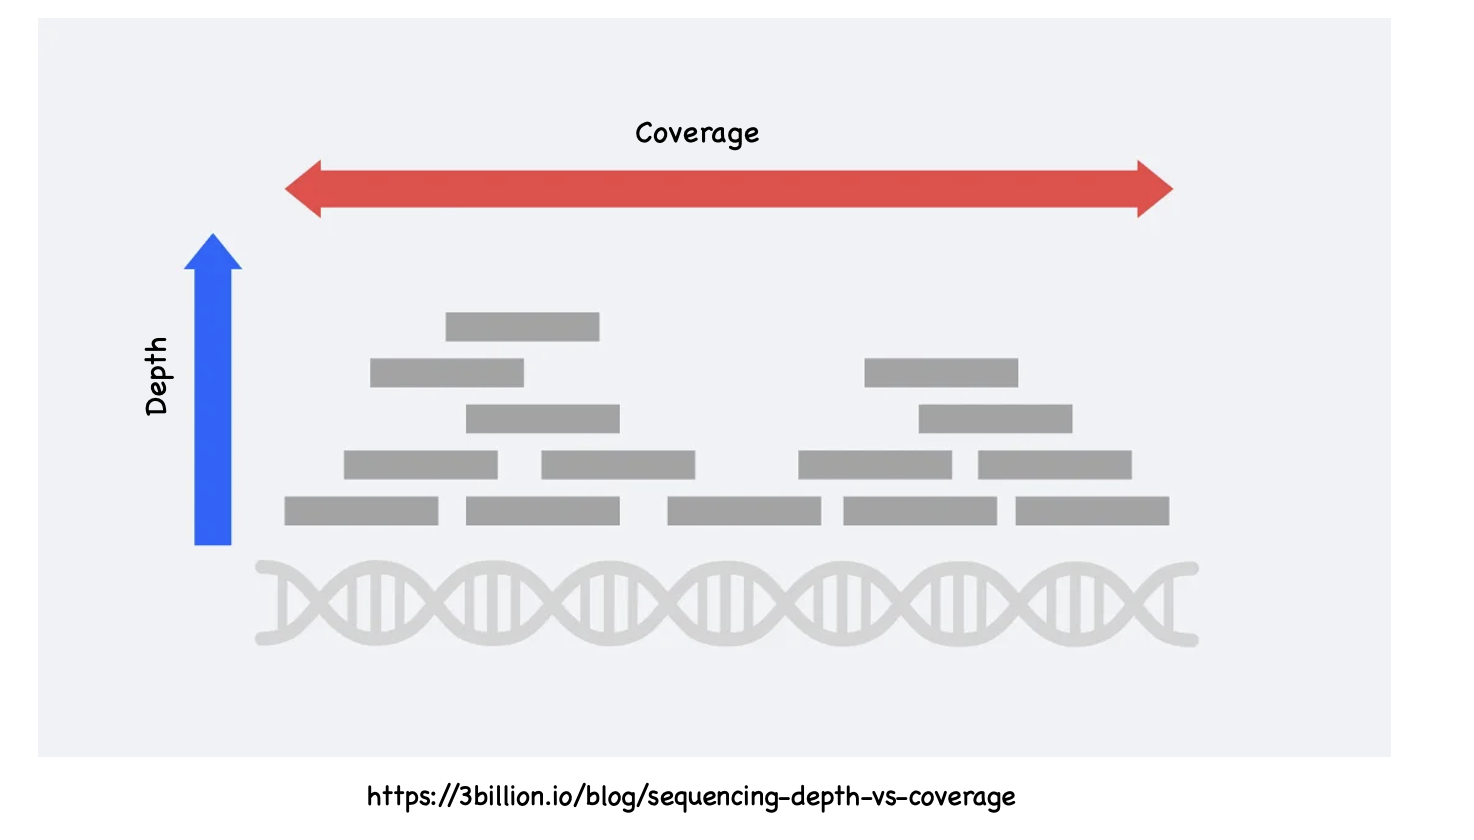

## **4.1 Genomic depth and Genome coverage**
<a name="GD"></a>

In [81]:
%%bash
mkdir -p result/depth
samtools-1.22/samtools depth result/consensus/HA/HA_aln.mapped_sorted.bam > result/depth/HA_depth.tsv
head result/depth/HA_depth.tsv

KY321927.1	1	1
KY321927.1	2	1
KY321927.1	3	1
KY321927.1	4	1
KY321927.1	5	1
KY321927.1	6	1
KY321927.1	7	1
KY321927.1	8	1
KY321927.1	9	1
KY321927.1	10	1


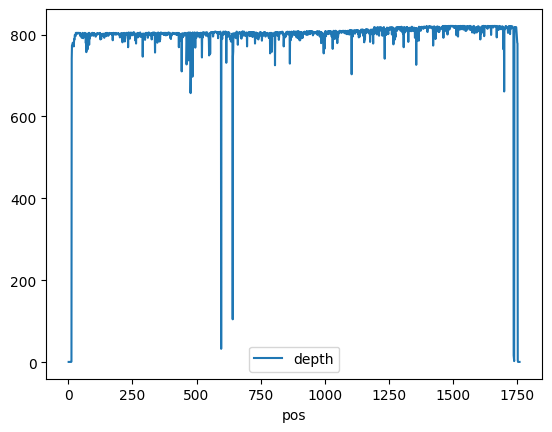

In [82]:
depth_plot = pd.read_csv("result/depth/HA_depth.tsv",sep="\t",header=None)
depth_plot.columns = ["id","pos","depth"]
depth_plot.plot.line(x='pos', y='depth')
plt.show()

## **4.2 Ambiguity / N’s**
<a name="AB"></a>

In [84]:
%%bash
seqkit fx2tab result/consensus/*/*_consensus.fasta -CN -nl

KY321927.1	1757	21
KF226114.1	982	0
KX697010.1	1410	2
KF226116.1	1497	10
KF226117.1	838	17
KX133409.1	2205	1
KF226119.1	886	886
KU888850.1	2316	6


# ⛳ What happen to that position ? check it !!! ▶ https://igv.org/app/


# **Step 5: Genome Annotation** 🧪
<a name="GAnno"></a>

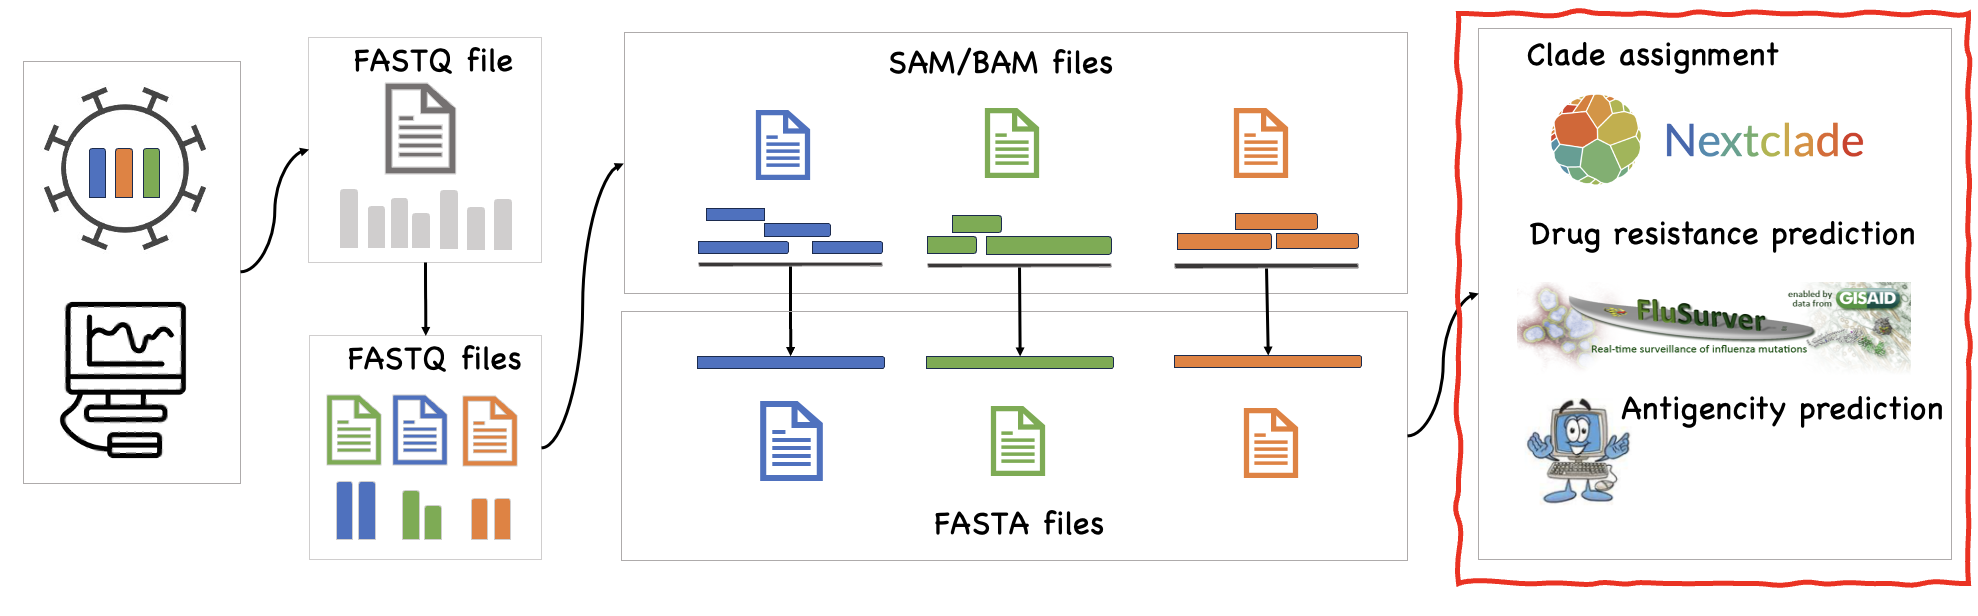

# ⛳ Clade annotation ▶ https://nextstrain.org/


<a name="CA"></a>

# ⛳ Vaccine effectiveness ▶ http://www.computationalbiology.cn/UNIVERSAL/html/antigenicVariantPrediction.php

<a name="VE"></a>

# ⛳ Drug resistance ▶ https://flusurver.bii.a-star.edu.sg/


<a name="DR"></a>